# NY Taxi Fare Prediction

In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn import metrics



In [187]:
train = pd.read_csv("E:/Study & Work/5th Sem Books/CS550- Machine Learning/Assignments/1/train_ny.csv", nrows = 1000000)
test = pd.read_csv("E:/Study & Work/5th Sem Books/CS550- Machine Learning/Assignments/1/test_ny.csv")

PART 1 --> DATA CLEANSING 

Will perform the following activities
1.   Shape of train and test sets
2.   Check for NaNs and drop them (if any)
3.   Check for outliers and drop them (if any)
4.   Type conversion of relevant fields





In [188]:
train.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5


In [189]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train.shape)

# See all the columns in the dataset
print("All columns are :", list(train.columns))

Shape of the Training data : (100000, 9)
All columns are : ['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [190]:
# Check datatypes & count of not-null values in each field
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         100000 non-null  int64  
 1   key                100000 non-null  object 
 2   fare_amount        100000 non-null  float64
 3   pickup_datetime    100000 non-null  object 
 4   pickup_longitude   100000 non-null  float64
 5   pickup_latitude    100000 non-null  float64
 6   dropoff_longitude  100000 non-null  float64
 7   dropoff_latitude   100000 non-null  float64
 8   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 6.9+ MB


In [191]:
#check for missing values in train data
train.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [192]:
#check for missing values in test data
test.isna().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

No missing Values were found !!

In [193]:
train

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5
...,...,...,...,...,...,...,...,...,...
99995,99995,2015-06-08 07:05:28.0000003,4.5,2015-06-08 07:05:28 UTC,-73.965111,40.772343,-73.952072,40.768021,1
99996,99996,2012-09-17 15:09:00.000000161,25.5,2012-09-17 15:09:00 UTC,-73.786162,40.640710,-73.878865,40.658735,1
99997,99997,2013-02-02 19:02:00.00000047,14.5,2013-02-02 19:02:00 UTC,-73.982023,40.758052,-73.993930,40.734462,1
99998,99998,2013-12-28 15:44:17.0000004,9.0,2013-12-28 15:44:17 UTC,-73.956423,40.778140,-73.981008,40.779568,1


In [194]:
train.shape

(100000, 9)

In [195]:
#check the target column
train['fare_amount']

0         4.9
1         4.9
2         6.9
3        14.1
4        12.1
         ... 
99995     4.5
99996    25.5
99997    14.5
99998     9.0
99999    15.0
Name: fare_amount, Length: 100000, dtype: float64

In [196]:
#Look for no. of non-positive fare_amount values.
train[train['fare_amount']<=0]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
38446,38446,2010-03-13 15:29:10.0000003,-9.3,2010-03-13 15:29:10 UTC,-73.977015,40.779925,-73.949747,40.790322,3
38582,38582,2010-02-27 02:37:10.0000004,-6.9,2010-02-27 02:37:10 UTC,-73.987800,40.747842,-73.981702,40.763600,1
44049,44049,2015-01-25 18:00:06.0000005,0.0,2015-01-25 18:00:06 UTC,-73.801102,40.670094,-73.801086,40.670536,1
55472,55472,2015-02-23 09:34:48.0000002,0.0,2015-02-23 09:34:48 UTC,-73.982201,40.768417,-73.981392,40.764874,1
61165,61165,2010-03-24 14:21:10.0000001,-2.5,2010-03-24 14:21:10 UTC,-73.953752,40.813413,-73.953743,40.813407,1
72873,72873,2015-01-15 07:49:05.0000004,0.0,2015-01-15 07:49:05 UTC,-73.901909,40.763988,-73.901917,40.763969,3


In [197]:
# Remove the non-positive fare_amount values.
train=train[train['fare_amount']>0]
train.shape

(99994, 9)

In [198]:
train.drop_duplicates(inplace=True)

C:\Users\david\AppData\Local\Temp\ipykernel_13540\1644190799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop_duplicates(inplace=True)


**Next let us explore the pickup latitude and longitudes**, 

Googling gave me this info
*   Latitudes range from -90 to 90.
*   Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them


In [199]:
train= train[(train['pickup_longitude']<=180) & (train['pickup_longitude']>=-180) & (train['dropoff_longitude']<=180) & (train['dropoff_longitude']>=-180)
           & (train['pickup_latitude']<=90) & (train['pickup_latitude']>=-90)
           & (train['dropoff_latitude']<=90) & (train['dropoff_latitude']>=-90)]

New york City Boundaries were found to be 
Longitude: -71°W to -79° W and Latitude: 40°N to 45°N.

In [200]:
train = train[(train['pickup_latitude']>40)&(train['pickup_latitude']<45)]
train = train[(train['dropoff_latitude']>40)&(train['dropoff_latitude']<45)]

train = train[(train['pickup_longitude']<-71)&(train['pickup_longitude']>-79)]
train = train[(train['dropoff_longitude']<-71)&(train['dropoff_longitude']>-79)]


In [201]:
train.shape

(97846, 9)

In [202]:
train

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2
1,1,2012-07-30 16:19:08.0000003,4.9,2012-07-30 16:19:08 UTC,-73.966597,40.794345,-73.965682,40.803808,2
2,2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1
3,3,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1
4,4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5
...,...,...,...,...,...,...,...,...,...
99995,99995,2015-06-08 07:05:28.0000003,4.5,2015-06-08 07:05:28 UTC,-73.965111,40.772343,-73.952072,40.768021,1
99996,99996,2012-09-17 15:09:00.000000161,25.5,2012-09-17 15:09:00 UTC,-73.786162,40.640710,-73.878865,40.658735,1
99997,99997,2013-02-02 19:02:00.00000047,14.5,2013-02-02 19:02:00 UTC,-73.982023,40.758052,-73.993930,40.734462,1
99998,99998,2013-12-28 15:44:17.0000004,9.0,2013-12-28 15:44:17 UTC,-73.956423,40.778140,-73.981008,40.779568,1


In [203]:
train.shape

(97846, 9)

Check the data types of each column


In [204]:
train.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [205]:
train.drop("Unnamed: 0",axis="columns",inplace=True)

In [206]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime

In [207]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [208]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [209]:
#check the dtypes after conversion
train.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

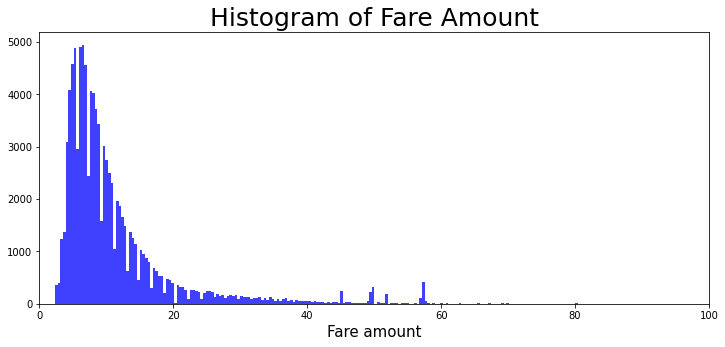

In [210]:
plt.figure(figsize=(12,5))
n,bins,patches=plt.hist(train.fare_amount,1000,facecolor='blue',alpha=0.75)
plt.xlabel("Fare amount",fontsize=15)
plt.title('Histogram of Fare Amount',fontsize=25)
plt.xlim(0,100)
plt.show()

From the graph we can conclude that, most of the fare amounts lie between 0 to 20

From the graph, Most of the passengers wouuld like to travel alone

In [211]:
test.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

Now, for **EDA**. The following are my considerations - 
1. Does the number of passengers affect the fare? 
2. Does the date and time of pickup affect the fare? 
3. Does the day of the week affect the fare? 
4. Does the distance travelled affect the fare? 

First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

Is this distance equal to the road travel distance? Do we have to do something else?


In [212]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [213]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [214]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [215]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-04-08 19:11:10.000000400,4.9,2009-04-08 19:11:10+00:00,-73.998287,40.727490,-73.989854,40.735239,2,1.116850,2009,4,8,2,19
1,2012-07-30 16:19:08.000000300,4.9,2012-07-30 16:19:08+00:00,-73.966597,40.794345,-73.965682,40.803808,2,1.055053,2012,7,30,0,16
2,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00+00:00,-73.971638,40.763382,-73.953767,40.783715,1,2.715959,2011,2,22,1,13
3,2010-10-07 21:09:35.000000200,14.1,2010-10-07 21:09:35+00:00,-74.003545,40.707399,-73.981312,40.750071,1,5.101370,2010,10,7,3,21
4,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00+00:00,-74.004532,40.707465,-73.977908,40.745633,5,4.800593,2009,10,2,4,22


In [216]:
train=train.drop(['key','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis='columns')
test=test.drop(['key','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis='columns')


[Text(0.5, 1.0, 'Count plot of Year')]

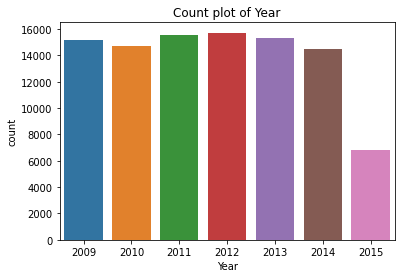

In [217]:
sns.countplot(x='Year', data=train).set(title='Count plot of Year')

[Text(0.5, 1.0, 'Count plot of Month')]

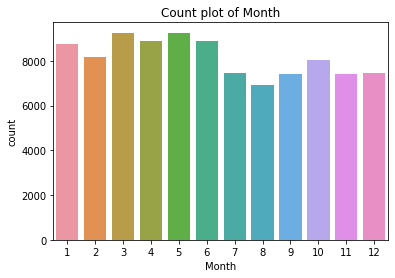

In [218]:

sns.countplot(x='Month', data=train).set(title='Count plot of Month')

[Text(0.5, 1.0, 'Count plot of Day of Week')]

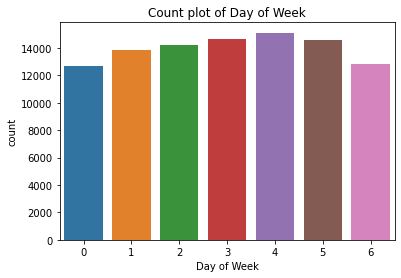

In [219]:

sns.countplot(x='Day of Week', data=train).set(title='Count plot of Day of Week')

[Text(0.5, 1.0, 'Count plot of Hour')]

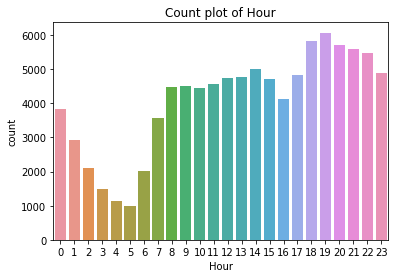

In [220]:
sns.countplot(x='Hour', data=train).set(title='Count plot of Hour')

[Text(0.5, 1.0, 'Count plot of Passenger count')]

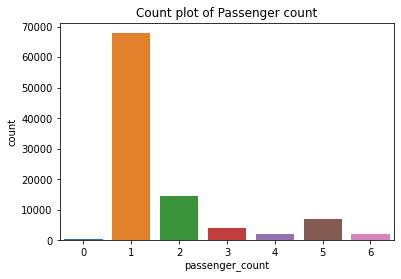

In [221]:
sns.countplot(x='passenger_count', data=train).set(title='Count plot of Passenger count')

* Detecting Outliers from each columns

<AxesSubplot:ylabel='fare_amount'>

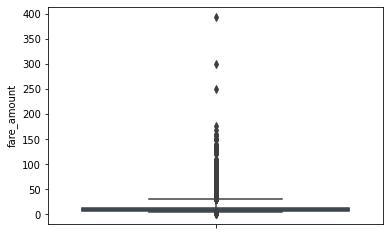

In [222]:
sns.boxplot(y=train['fare_amount'],whis=[5,95])

<AxesSubplot:ylabel='passenger_count'>

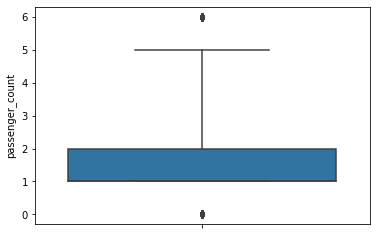

In [223]:
sns.boxplot(y=train['passenger_count'],whis=[5,95])

<AxesSubplot:ylabel='H_Distance'>

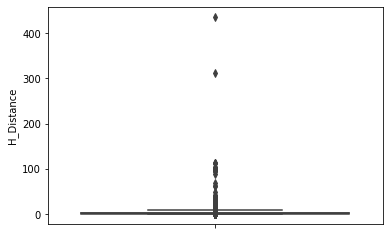

In [224]:
sns.boxplot(y=train['H_Distance'],whis=[5,95])


<AxesSubplot:ylabel='Year'>

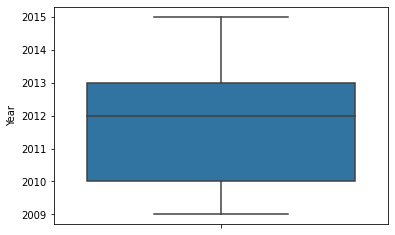

In [225]:
sns.boxplot(y=train['Year'],whis=[5,95])

<AxesSubplot:ylabel='Month'>

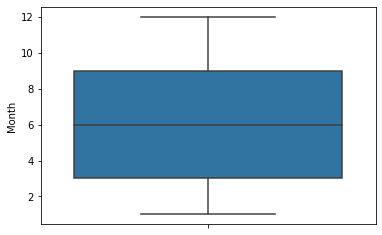

In [226]:
sns.boxplot(y=train['Month'],whis=[5,95])

<AxesSubplot:ylabel='Date'>

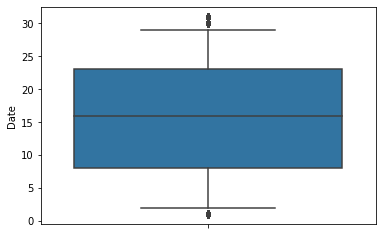

In [227]:
sns.boxplot(y=train['Date'],whis=[5,95])

<AxesSubplot:ylabel='Day of Week'>

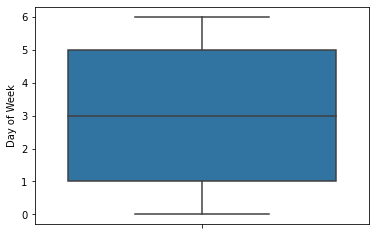

In [228]:
sns.boxplot(y=train['Day of Week'],whis=[5,95])

<AxesSubplot:ylabel='Hour'>

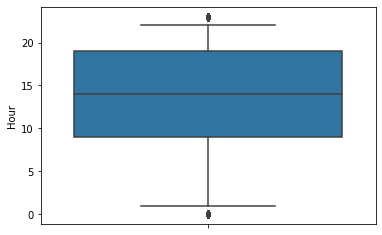

In [229]:
sns.boxplot(y=train['Hour'],whis=[5,95])

**Outliers Exists in these columns - fare_amount, passenger_count, H_Distance ,Date,Hour**

In [230]:
#Removing Outliers
def outliers(data,column,a):
    for x in column:
        iqr = data[x].quantile(0.75) - data[x].quantile(0.25)
        upper_boundary = data[x].quantile(0.75) + (a*iqr)
        lower_boundary = data[x].quantile(0.25) - (a*iqr)
        data = data[(data[x] < upper_boundary) & (data[x] > lower_boundary)]
    return data

In [231]:
train = outliers(train,['fare_amount','passenger_count','H_Distance','Date','Hour'],4.5)

In [232]:
train

,fare_amount,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,4.9,2,1.116850,2009,4,8,2,19
1,4.9,2,1.055053,2012,7,30,0,16
2,6.9,1,2.715959,2011,2,22,1,13
3,14.1,1,5.101370,2010,10,7,3,21
4,12.1,5,4.800593,2009,10,2,4,22
...,...,...,...,...,...,...,...,...
99995,4.5,1,1.198577,2015,6,8,0,7
99996,25.5,1,8.073564,2012,9,17,0,15
99997,14.5,1,2.808335,2013,2,2,5,19
99998,9.0,1,2.076158,2013,12,28,5,15


In [233]:
train.shape

(94881, 8)

In [234]:
## Normalization
from sklearn.preprocessing import StandardScaler
nor = StandardScaler()
for i in train.columns:
    a = np.array(train[i]).reshape(-1,1)
    nor.fit(a)
    train[i] = nor.transform(a).reshape(1,-1)[0]

In [235]:
train

,fare_amount,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,-0.823022,0.246187,-0.720492,-1.464722,-0.658305,-0.883917,-0.529267,0.839552
1,-0.823022,0.246187,-0.745564,0.147004,0.214757,1.645812,-1.555883,0.379473
2,-0.506804,-0.519614,-0.071708,-0.390238,-1.240346,0.725910,-1.042575,-0.080605
3,0.631579,-0.519614,0.896092,-0.927480,1.087820,-0.998905,-0.015960,1.146271
4,0.315361,2.543591,0.774062,-1.464722,1.087820,-1.573843,0.497348,1.299630
...,...,...,...,...,...,...,...,...
99995,-0.886265,-0.519614,-0.687334,1.758730,-0.076263,-0.883917,-1.555883,-1.000762
99996,2.434018,-0.519614,2.101958,0.147004,0.796799,0.150972,-1.555883,0.226114
99997,0.694822,-0.519614,-0.034230,0.684246,-1.240346,-1.573843,1.010656,0.839552
99998,-0.174776,-0.519614,-0.331285,0.684246,1.669861,1.415836,1.010656,0.226114


In [236]:
from sklearn.model_selection import train_test_split
x=train.drop("fare_amount",axis="columns")
y=train['fare_amount']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [237]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (66416, 7)
Shape of x_test:  (28465, 7)
Shape of y_train:  (66416,)
Shape of y_test:  (28465,)


**Building Pipeline**

In [238]:
# importing required Libraries
from sklearn.
 import StandardScaler,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [239]:
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())])

In [240]:
numeric_features=list(x.columns)
numeric_features

['passenger_count',
 'H_Distance',
 'Year',
 'Month',
 'Date',
 'Day of Week',
 'Hour']

In [241]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)])

In [242]:
from sklearn.linear_model import LinearRegression
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LinearRegression())
           ])

In [243]:
rf_model = pipeline.fit(x_train, y_train)
print (rf_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count',
                                                   'H_Distance', 'Year',
                                                   'Month', 'Date',
                                                   'Day of Week', 'Hour'])])),
                ('regressor', LinearRegression())])


In [244]:
predictions = rf_model.predict(x_test)
print ("Accuracy: ",r2_score(y_test, predictions))
print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test,predictions))

Accuracy:  0.7705317147070985
Mean Absolute Percentage Error: 5.756693303770089


* Using Linear Regression

In [245]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,

print("Error: ",mean_squared_error(y_test,y_pred))
print("Accuracy: ",lr.score(x_test,y_test))
print("Mean Absolute percentage error: ",mean_absolute_percentage_error(y_test,y_pred))

Error:  0.23123467938765918
Accuracy:  0.7705317147070985
Mean Absolute percentage error:  5.75669330377009


* Stochastic Gradient Descent Regression

In [246]:
from sklearn.linear_model import SGDRegressor
model_sgd=SGDRegressor()
model_sgd.fit(x_train,y_train)
y_pre=model_sgd.predict(x_test)

print("Accuracy: ",model_sgd.score(x_train,y_train))
print("Mean Absolute Percentage Error: ",mean_absolute_percentage_error(y_test,y_pre))

Accuracy:  0.7690631602076234
Mean Absolute Percentage Error:  5.873603387829168


* K-FOLD CROSS VALIDATION

In [247]:
train

,fare_amount,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,-0.823022,0.246187,-0.720492,-1.464722,-0.658305,-0.883917,-0.529267,0.839552
1,-0.823022,0.246187,-0.745564,0.147004,0.214757,1.645812,-1.555883,0.379473
2,-0.506804,-0.519614,-0.071708,-0.390238,-1.240346,0.725910,-1.042575,-0.080605
3,0.631579,-0.519614,0.896092,-0.927480,1.087820,-0.998905,-0.015960,1.146271
4,0.315361,2.543591,0.774062,-1.464722,1.087820,-1.573843,0.497348,1.299630
...,...,...,...,...,...,...,...,...
99995,-0.886265,-0.519614,-0.687334,1.758730,-0.076263,-0.883917,-1.555883,-1.000762
99996,2.434018,-0.519614,2.101958,0.147004,0.796799,0.150972,-1.555883,0.226114
99997,0.694822,-0.519614,-0.034230,0.684246,-1.240346,-1.573843,1.010656,0.839552
99998,-0.174776,-0.519614,-0.331285,0.684246,1.669861,1.415836,1.010656,0.226114


In [248]:
train.shape

(94881, 8)

In [249]:
k=5 #Splitting DataSet into 5 Folds

In [250]:
train_1,train_2,train_3,train_4,train_5=(train[0:18971],train[18971:37942],train[37942:56915],train[56915:75886],train[75886:94856])

In [251]:
print(train_1.shape,train_2.shape,train_3.shape,train_4.shape,train_5.shape)

(18971, 8) (18971, 8) (18973, 8) (18971, 8) (18970, 8)


In [252]:
train_1

,fare_amount,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,-0.823022,0.246187,-0.720492,-1.464722,-0.658305,-0.883917,-0.529267,0.839552
1,-0.823022,0.246187,-0.745564,0.147004,0.214757,1.645812,-1.555883,0.379473
2,-0.506804,-0.519614,-0.071708,-0.390238,-1.240346,0.725910,-1.042575,-0.080605
3,0.631579,-0.519614,0.896092,-0.927480,1.087820,-0.998905,-0.015960,1.146271
4,0.315361,2.543591,0.774062,-1.464722,1.087820,-1.573843,0.497348,1.299630
...,...,...,...,...,...,...,...,...
19998,-0.127343,-0.519614,0.326117,-0.390238,0.214757,-1.343868,-1.555883,0.686192
19999,0.252118,-0.519614,0.721347,0.147004,-0.076263,0.150972,1.523964,-0.080605
20000,0.252118,1.011988,-0.168753,-0.390238,-0.949326,0.955886,-0.015960,-0.540683
20001,0.062387,-0.519614,-0.366841,0.684246,-0.949326,0.610923,-0.015960,-0.694043


Iteration 1

In [253]:
test_0=train_1
train_cross=pd.concat([train_2,train_3,train_4,train_5])
x_cross_train=train_cross.drop('fare_amount',axis="columns")
y_cross_train=train_cross['fare_amount']

x_cross_test=test_0.drop('fare_amount',axis="columns")
y_cross_test=test_0['fare_amount']
cross_1=LinearRegression()
cross_1.fit(x_cross_train,y_cross_train)

prediction=cross_1.predict(x_cross_test)
cross_1.score(x_cross_test,y_cross_test)

0.7772008615766742

Iteration 2

In [254]:
test_0=train_2
train_cross=pd.concat([train_1,train_3,train_4,train_5])
x_cross_train=train_cross.drop('fare_amount',axis="columns")
y_cross_train=train_cross['fare_amount']

x_cross_test=test_0.drop('fare_amount',axis="columns")
y_cross_test=test_0['fare_amount']
cross_2=LinearRegression()
cross_2.fit(x_cross_train,y_cross_train)

prediction=cross_2.predict(x_cross_test)
cross_2.score(x_cross_test,y_cross_test)

0.7615792558232096

Iteration 3

In [255]:
test_0=train_3
train_cross=pd.concat([train_1,train_2,train_4,train_5])
x_cross_train=train_cross.drop('fare_amount',axis="columns")
y_cross_train=train_cross['fare_amount']

x_cross_test=test_0.drop('fare_amount',axis="columns")
y_cross_test=test_0['fare_amount']
cross_3=LinearRegression()
cross_3.fit(x_cross_train,y_cross_train)

prediction=cross_3.predict(x_cross_test)
cross_3.score(x_cross_test,y_cross_test)

0.7730988439026474

Iteration 4

In [256]:
test_0=train_4
train_cross=pd.concat([train_1,train_2,train_4,train_5])
x_cross_train=train_cross.drop('fare_amount',axis="columns")
y_cross_train=train_cross['fare_amount']

x_cross_test=test_0.drop('fare_amount',axis="columns")
y_cross_test=test_0['fare_amount']
cross_4=LinearRegression()
cross_4.fit(x_cross_train,y_cross_train)

prediction=cross_4.predict(x_cross_test)
cross_4.score(x_cross_test,y_cross_test)

0.7639934487309642

Iteration 5

In [257]:
test_0=train_5
train_cross=pd.concat([train_1,train_2,train_4,train_5])
x_cross_train=train_cross.drop('fare_amount',axis="columns")
y_cross_train=train_cross['fare_amount']

x_cross_test=test_0.drop('fare_amount',axis="columns")
y_cross_test=test_0['fare_amount']
cross_5=LinearRegression()
cross_5.fit(x_cross_train,y_cross_train)

prediction=cross_5.predict(x_cross_test)
cross_5.score(x_cross_test,y_cross_test)

0.7730889343526095

Cross_1 gives more accuracy than others

In [258]:
test

,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,1,2.323260,2015,1,27,1,13
1,1,2.425353,2015,1,27,1,13
2,1,0.618628,2011,10,8,5,11
3,1,1.961033,2012,12,1,5,21
4,1,5.387301,2012,12,1,5,21
...,...,...,...,...,...,...,...
9909,6,2.124874,2015,5,10,6,12
9910,6,3.270969,2015,1,12,0,17
9911,6,19.183941,2015,4,19,6,20
9912,6,8.343486,2015,1,31,5,1


In [259]:
f=cross_1.predict(test)
z=pd.DataFrame({"Predicted_Fare":f})
z


,Predicted_Fare
0,264.606998
1,264.695463
2,262.856588
3,264.367367
4,267.336236
...,...
9909,264.529111
9910,265.523987
9911,279.390660
9912,269.625742


In [260]:
final=pd.concat([test,z],axis=1)
final

,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour,Predicted_Fare
0,1,2.323260,2015,1,27,1,13,264.606998
1,1,2.425353,2015,1,27,1,13,264.695463
2,1,0.618628,2011,10,8,5,11,262.856588
3,1,1.961033,2012,12,1,5,21,264.367367
4,1,5.387301,2012,12,1,5,21,267.336236
...,...,...,...,...,...,...,...,...
9909,6,2.124874,2015,5,10,6,12,264.529111
9910,6,3.270969,2015,1,12,0,17,265.523987
9911,6,19.183941,2015,4,19,6,20,279.390660
9912,6,8.343486,2015,1,31,5,1,269.625742
